In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pickle
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings("ignore")

In [45]:
dataset=pd.read_csv('train.csv')
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Number of features with missing values:  19
              Missing Ratio  Number of Null Values
PoolQC            99.520548                   1453
MiscFeature       96.301370                   1406
Alley             93.767123                   1369
Fence             80.753425                   1179
FireplaceQu       47.260274                    690
LotFrontage       17.739726                    259
GarageYrBlt        5.547945                     81
GarageType         5.547945                     81
GarageFinish       5.547945                     81
GarageQual         5.547945                     81
GarageCond         5.547945                     81
BsmtFinType2       2.602740                     38
BsmtExposure       2.602740                     38
BsmtFinType1       2.534247                     37
BsmtCond           2.534247                     37
BsmtQual           2.534247                     37
MasVnrArea         0.547945                      8
MasVnrType         0.547945           

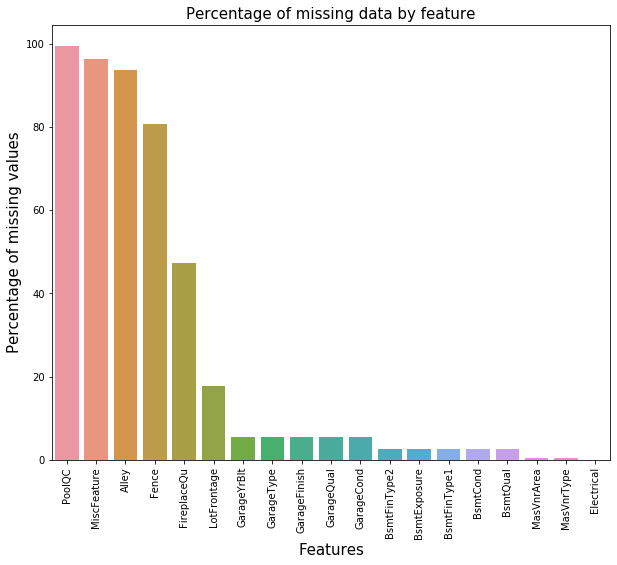

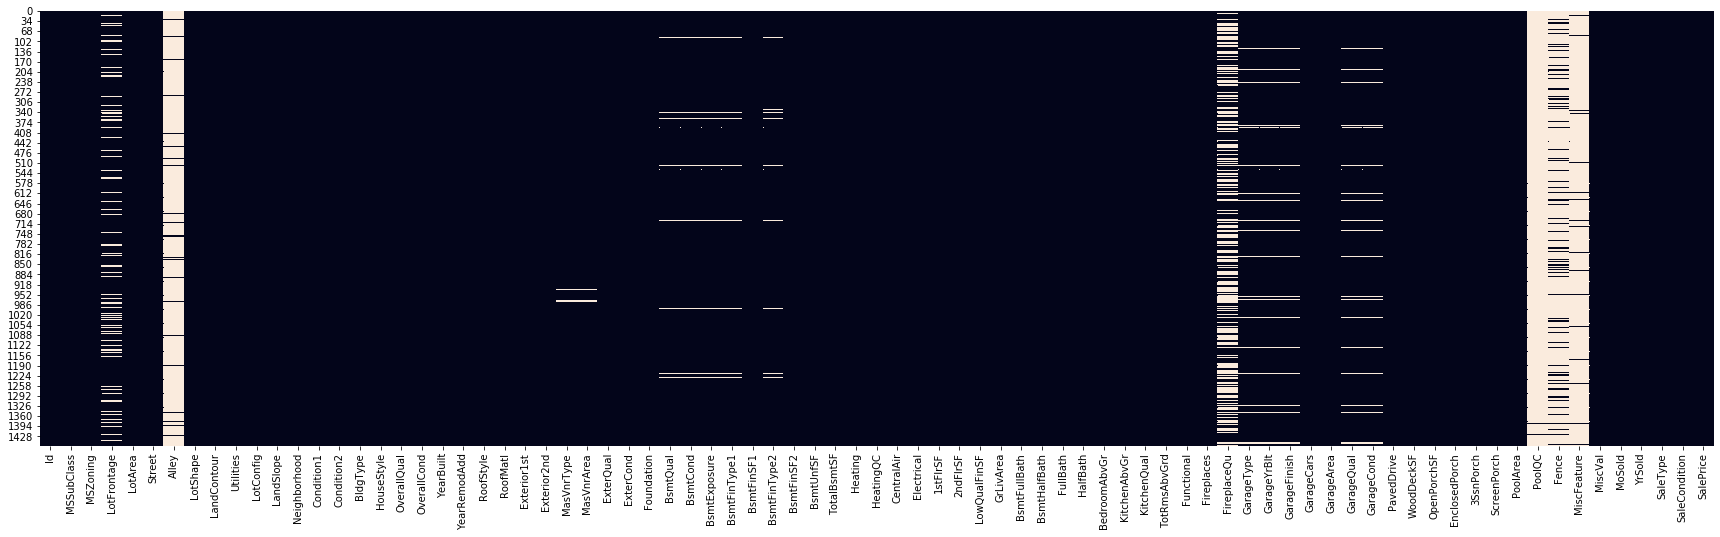

In [46]:
def missing_values_plots(X):
    X_na = (X.isnull().sum() / len(X)) * 100
    X_na = X_na.drop(X_na[X_na == 0].index).sort_values(ascending=False)[:30]
    
    X_na_sum = X.isnull().sum()
    X_na_sum = X_na_sum.drop(X_na_sum[X_na_sum == 0].index).sort_values(ascending=False)[:30]
    
    missing_data = pd.DataFrame({'Missing Ratio' :X_na, 'Number of Null Values':X_na_sum})
    
    print("Number of features with missing values: ", len(missing_data))
    print(missing_data)
    
    if len(missing_data) > 0: 
        f, ax = plt.subplots(figsize=(10, 8))
        plt.xticks(rotation='90')
        sns.barplot(x=X_na.index, y=X_na)
        plt.xlabel('Features', fontsize=15)
        plt.ylabel('Percentage of missing values', fontsize=15)
        plt.title('Percentage of missing data by feature', fontsize=15)
        plt.show()
    
    fig, ax = plt.subplots(figsize=(30,8))
    sns.heatmap(X.iloc[:,:X.shape[1]].isnull(),cbar=False,ax=ax) 
    
missing_values_plots(dataset)

## Train Test Split

In [47]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(dataset,dataset['SalePrice'],test_size=0.1,random_state=143,shuffle=True)

In [48]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
664,665,20,RL,49.0,20896,Pave,NaN,IR2,Lvl,AllPub,CulDSac,Gtl,Somerst,RRAn,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Ex,TA,Mn,GLQ,1721,Unf,0,356,2077,GasA,Ex,Y,SBrkr,2097,0,0,2097,1,0,1,1,1,1,Ex,8,Typ,1,Ex,Attchd,2005.0,Fin,3,1134,TA,TA,Y,192,267,0,0,0,0,NaN,NaN,NaN,0,1,2006,New,Partial,423000
678,679,20,RL,80.0,11844,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,1Fam,1Story,8,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,464.0,Gd,TA,PConc,Ex,TA,Mn,Unf,0,Unf,0,2046,2046,GasA,Ex,Y,SBrkr,2046,0,0,2046,0,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2008.0,Fin,3,834,TA,TA,Y,322,82,0,0,0,0,NaN,NaN,NaN,0,7,2009,New,Partial,372500
80,81,60,RL,100.0,13000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,2Story,6,6,1968,1968,Gable,CompShg,VinylSd,VinylSd,BrkFace,576.0,TA,Gd,CBlock,Gd,TA,No,Rec,448,Unf,0,448,896,GasA,TA,Y,SBrkr,1182,960,0,2142,0,0,2,1,4,1,Gd,8,Typ,1,Gd,Attchd,1968.0,Fin,1,509,TA,TA,Y,0,72,0,0,252,0,NaN,NaN,NaN,0,6,2009,WD,Normal,193500
165,166,190,RL,62.0,10106,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,2fmCon,1.5Fin,5,7,1940,1999,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Gd,BrkTil,TA,TA,No,ALQ,351,Rec,181,112,644,GasA,Gd,Y,SBrkr,808,547,0,1355,1,0,2,0,4,2,TA,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,140,0,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,127500
1259,1260,20,RL,65.0,9750,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,8,1969,1969,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,602,LwQ,438,14,1054,GasA,Gd,Y,SBrkr,1054,0,0,1054,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1969.0,Unf,2,460,TA,TA,Y,180,0,0,0,80,0,NaN,NaN,NaN,0,7,2008,WD,Normal,151000


In [49]:
y_train.shape

(1314,)

## Missing Values

Train: 
Number of features with missing values:  19
              Missing Ratio  Number of Null Values
PoolQC            99.467275                   1307
MiscFeature       96.575342                   1269
Alley             93.759513                   1232
Fence             80.060883                   1052
FireplaceQu       47.031963                    618
LotFrontage       17.351598                    228
GarageYrBlt        5.175038                     68
GarageType         5.175038                     68
GarageFinish       5.175038                     68
GarageQual         5.175038                     68
GarageCond         5.175038                     68
BsmtExposure       2.511416                     33
BsmtFinType2       2.435312                     32
BsmtFinType1       2.435312                     32
BsmtCond           2.435312                     32
BsmtQual           2.435312                     32
MasVnrArea         0.532725                      7
MasVnrType         0.532725   

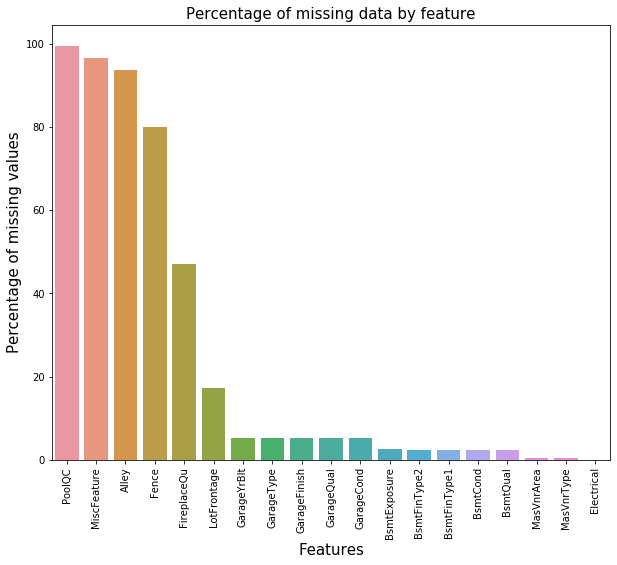

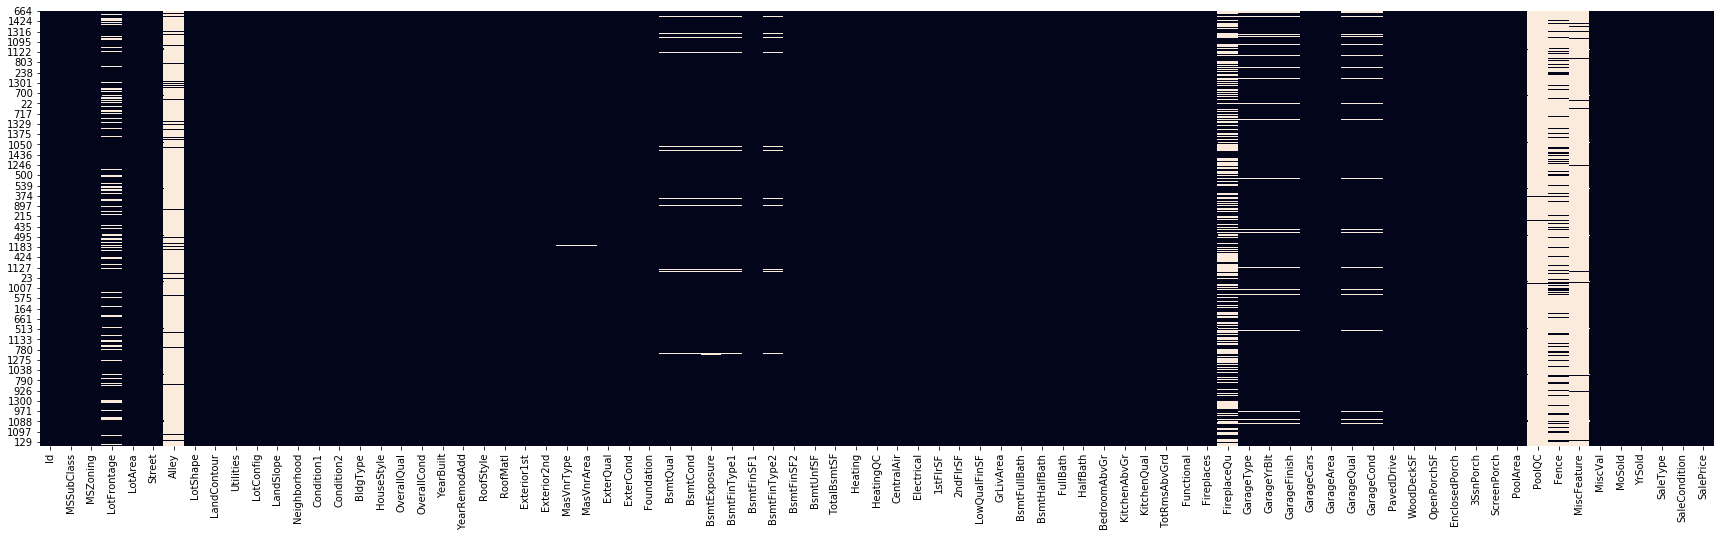

In [50]:
print("Train: ")
missing_values_plots(X_train)

Test: 
Number of features with missing values:  18
              Missing Ratio  Number of Null Values
PoolQC           100.000000                    146
MiscFeature       93.835616                    137
Alley             93.835616                    137
Fence             86.986301                    127
FireplaceQu       49.315068                     72
LotFrontage       21.232877                     31
GarageYrBlt        8.904110                     13
GarageType         8.904110                     13
GarageFinish       8.904110                     13
GarageQual         8.904110                     13
GarageCond         8.904110                     13
BsmtFinType2       4.109589                      6
BsmtFinType1       3.424658                      5
BsmtExposure       3.424658                      5
BsmtCond           3.424658                      5
BsmtQual           3.424658                      5
MasVnrArea         0.684932                      1
MasVnrType         0.684932    

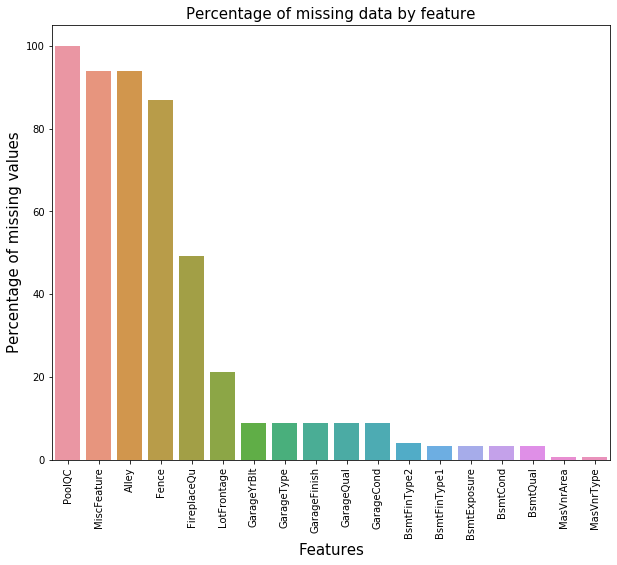

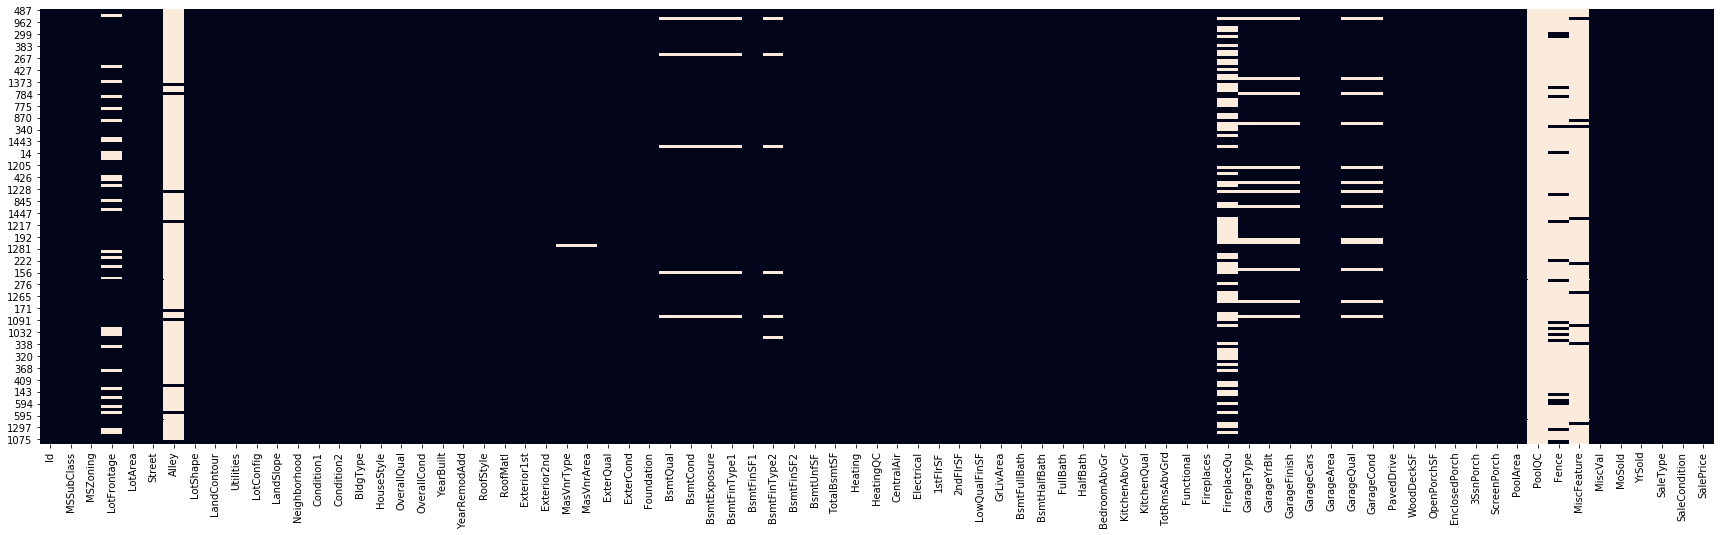

In [51]:
print("Test: ")
missing_values_plots(X_test)

### Catogorical Features

In [52]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
missing_data = [feature for feature in X_train.columns if X_train[feature].isnull().sum()!=0 and X_train[feature].dtypes=='O']
print(len(missing_data))
for feature in missing_data:
    print("Train: {}: {}% missing values".format(feature,np.round(X_train[feature].isnull().mean(),4)))

16
Train: Alley: 0.9376% missing values
Train: MasVnrType: 0.0053% missing values
Train: BsmtQual: 0.0244% missing values
Train: BsmtCond: 0.0244% missing values
Train: BsmtExposure: 0.0251% missing values
Train: BsmtFinType1: 0.0244% missing values
Train: BsmtFinType2: 0.0244% missing values
Train: Electrical: 0.0008% missing values
Train: FireplaceQu: 0.4703% missing values
Train: GarageType: 0.0518% missing values
Train: GarageFinish: 0.0518% missing values
Train: GarageQual: 0.0518% missing values
Train: GarageCond: 0.0518% missing values
Train: PoolQC: 0.9947% missing values
Train: Fence: 0.8006% missing values
Train: MiscFeature: 0.9658% missing values


In [53]:
missing_data_test = [feature for feature in X_test.columns if X_test[feature].isnull().sum()!=0 and X_test[feature].dtypes=='O']
print(len(missing_data_test))
for feature in missing_data_test:
    print("Test : {}: {}% missing values".format(feature,np.round(X_test[feature].isnull().mean(),4)))

15
Test : Alley: 0.9384% missing values
Test : MasVnrType: 0.0068% missing values
Test : BsmtQual: 0.0342% missing values
Test : BsmtCond: 0.0342% missing values
Test : BsmtExposure: 0.0342% missing values
Test : BsmtFinType1: 0.0342% missing values
Test : BsmtFinType2: 0.0411% missing values
Test : FireplaceQu: 0.4932% missing values
Test : GarageType: 0.089% missing values
Test : GarageFinish: 0.089% missing values
Test : GarageQual: 0.089% missing values
Test : GarageCond: 0.089% missing values
Test : PoolQC: 1.0% missing values
Test : Fence: 0.8699% missing values
Test : MiscFeature: 0.9384% missing values


In [54]:
# Replace missing value with a new label
def replace_cat_feature(dataset,features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

X_train=replace_cat_feature(X_train,missing_data)
X_test=replace_cat_feature(X_test,missing_data_test)

print(X_train[missing_data].isnull().sum())
print("=================================================")
print(X_test[missing_data_test].isnull().sum())

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64
Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64


### Numerical Features

In [55]:

## Now lets check for numerical variables the contains missing values
missing_data_numerical = [feature for feature in X_train.columns if X_train[feature].isnull().sum()!=0 and X_train[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in missing_data_numerical:
    print("Train: {}: {}% missing value".format(feature,np.around(X_train[feature].isnull().mean(),4)))

Train: LotFrontage: 0.1735% missing value
Train: MasVnrArea: 0.0053% missing value
Train: GarageYrBlt: 0.0518% missing value


In [56]:

## Now lets check for numerical variables the contains missing values
missing_data_numerical_test = [feature for feature in X_test.columns if X_test[feature].isnull().sum()!=0 and X_test[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in missing_data_numerical_test:
    print("Test: {}: {}% missing value".format(feature,np.around(X_test[feature].isnull().mean(),4)))

Test: LotFrontage: 0.2123% missing value
Test: MasVnrArea: 0.0068% missing value
Test: GarageYrBlt: 0.089% missing value


In [57]:
## Replacing the numerical Missing Values

def replace_num_feature(dataset,missing_data,TRAIN=True):
    data=dataset.copy()
    for feature in missing_data:
        ## We will replace by using median since there are outliers
        median_value=data[feature].median()
        data[feature]=data[feature].fillna(median_value)
    return data


X_train = replace_num_feature(X_train,X_train[missing_data_numerical],True)
X_test = replace_num_feature(X_test,X_train[missing_data_numerical],False)

print(X_train[missing_data_numerical].isnull().sum())
print("=================================================")
print(X_test[missing_data_numerical_test].isnull().sum())

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64
LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64


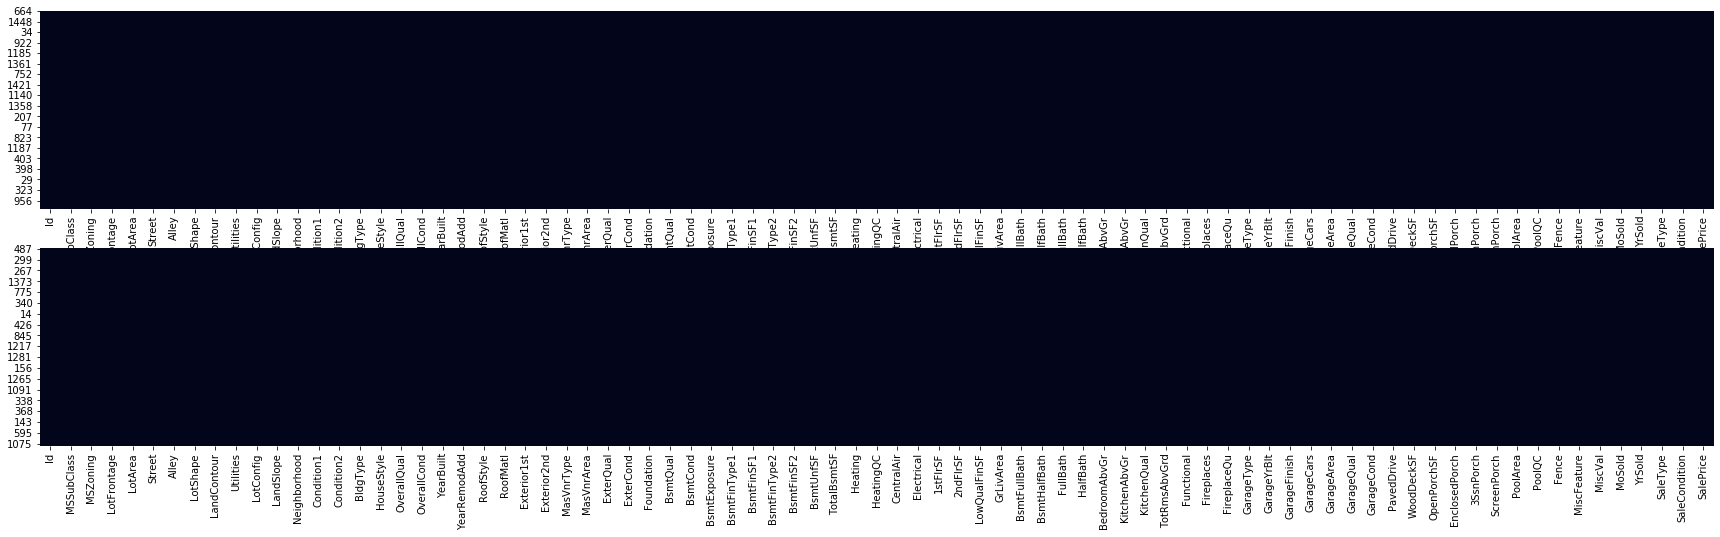

In [58]:
fig, ax = plt.subplots(2,1,figsize=(30,8))
sns.heatmap(X_train.iloc[:,:X_train.shape[1]].isnull(),cbar=False,ax=ax[0])
sns.heatmap(X_test.iloc[:,:X_test.shape[1]].isnull(),cbar=False,ax=ax[1])

In [59]:
## Temporal Variables (Date Time Variables)

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    X_train[feature+"_years"] = X_train['YrSold'] - X_train[feature]
    X_test[feature+"_years"] = X_test['YrSold'] - X_test[feature]

In [60]:
X_train[['YearBuilt','YearRemodAdd','GarageYrBlt','YearBuilt_years','YearRemodAdd_years','GarageYrBlt_years']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YearBuilt_years,YearRemodAdd_years,GarageYrBlt_years
664,2005,2006,2005.0,1,0,1.0
678,2008,2008,2008.0,1,1,1.0
80,1968,1968,1968.0,41,41,41.0
165,1940,1999,1980.0,68,9,28.0
1259,1969,1969,1969.0,39,39,39.0


In [61]:
X_test[['YearBuilt','YearRemodAdd','GarageYrBlt','YearBuilt_years','YearRemodAdd_years','GarageYrBlt_years']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YearBuilt_years,YearRemodAdd_years,GarageYrBlt_years
487,1971,1971,1971.0,36,36,36.0
1145,1928,1950,1928.0,78,56,78.0
293,1977,1994,1977.0,29,12,29.0
705,1930,1950,1979.0,80,60,31.0
962,1976,1976,1976.0,31,31,31.0


In [62]:
# Since the numerical variables are skewed we will perform log normal distribution

# there are many features skewed, but they have zero values - log(0) - undefined

num_features = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice'] 

for feature in num_features:
    X_train[feature]=np.log(X_train[feature])
    X_test[feature]=np.log(X_test[feature])

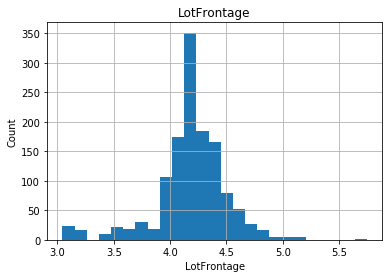

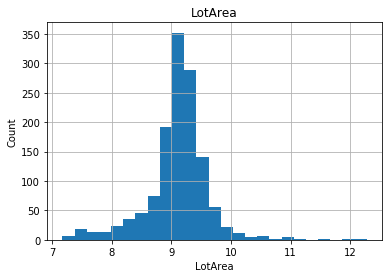

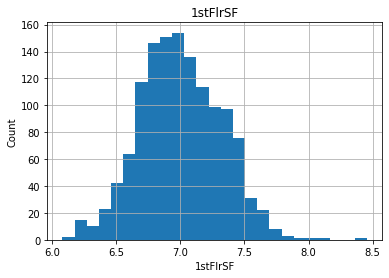

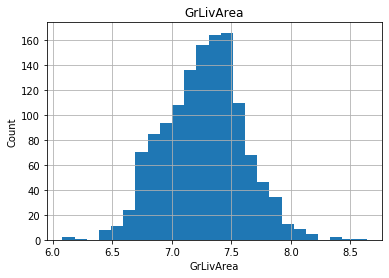

In [63]:
for feature in num_features:
    if feature != 'SalePrice':
        data=X_train.copy()
        data[feature].hist(bins=25)
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.title(feature)
        plt.show()

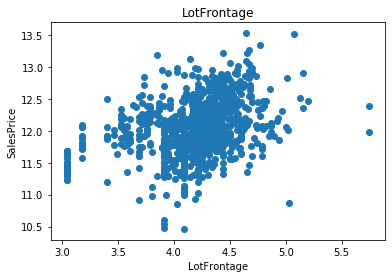

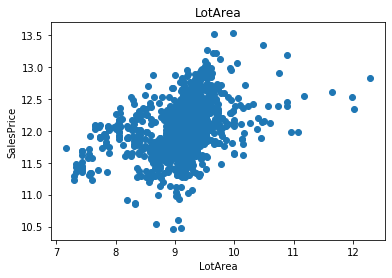

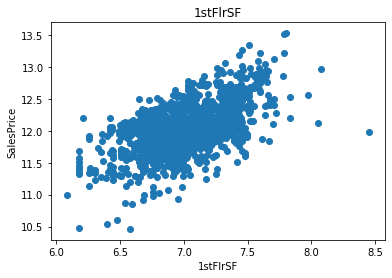

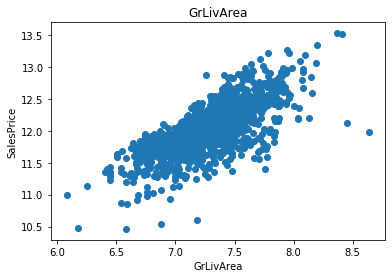

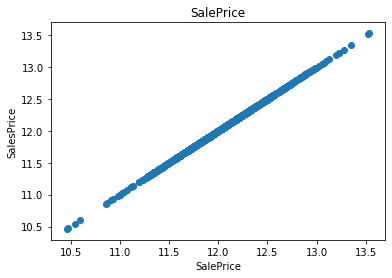

In [64]:
for feature in num_features:
    data = X_train.copy()
    plt.scatter(data[feature],data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalesPrice')
    plt.title(feature)
    plt.show()

## Handling Rare Categorical Feature

We will remove categorical variables that are present less than 1% of the observations

In [65]:
categorical_features = [feature for feature in X_train.columns if X_train[feature].dtype=='O']
categorical_features_test = [feature for feature in X_test.columns if X_test[feature].dtype=='O']

print(len(categorical_features))
print(len(categorical_features_test))

categorical_features

43
43


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [66]:
def replace_cat_rare_feature(X_train,X_test,features):
    data = X_train.copy()
    data_test = X_test.copy()
    for feature in features:
        temp=data.groupby(feature)['SalePrice'].count()/len(data) # As there is no SalePrice column for test data. We can take any variable.
        temp_df=temp[temp>0.01].index
        data[feature]=np.where(data[feature].isin(temp_df),data[feature],'Rare_var')
        data_test[feature]=np.where(data_test[feature].isin(temp_df),data_test[feature],'Rare_var')
    return data, data_test

X_train, X_test = replace_cat_rare_feature(X_train, X_test, categorical_features)


In [67]:
print(len(categorical_features))
print(len(categorical_features_test))
X_train[categorical_features].head()

43
43


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
664,RL,Pave,Missing,IR2,Lvl,AllPub,CulDSac,Gtl,Somerst,RRAn,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Ex,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Ex,Attchd,Fin,TA,TA,Y,Missing,Missing,Missing,New,Partial
678,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,1Fam,1Story,Hip,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Mn,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,Missing,Missing,Missing,New,Partial
80,RL,Pave,Missing,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,Gd,CBlock,Gd,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,Missing,Missing,Missing,WD,Normal
165,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,2fmCon,1.5Fin,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,Gd,BrkTil,TA,TA,No,ALQ,Rec,GasA,Gd,Y,SBrkr,TA,Typ,Missing,Missing,Missing,Missing,Missing,Y,Missing,Missing,Missing,WD,Normal
1259,RL,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,Gd,TA,No,ALQ,LwQ,GasA,Gd,Y,SBrkr,TA,Typ,Missing,Attchd,Unf,TA,TA,Y,Missing,Missing,Missing,WD,Normal


## Label Encoding for ordinal variables

In [68]:
'''from sklearn.preprocessing import LabelEncoder

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir')

print(len(cols))

## process columns, apply LabelEncoder to categorical features

data=dataset.copy()
data_test=dataset_test.copy()
for c in cols:
    le = LabelEncoder()
    data[c] = le.fit_transform(data[c])
    data_test[c] = data_test[c].map(lambda s: '<unknown>' if s not in le.classes_ else s)
    le.classes_ = np.append(le.classes_, '<unknown>')
    data_test[c] = le.transform(data_test[c])'''

"from sklearn.preprocessing import LabelEncoder\n\ncols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', \n        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', \n        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',\n        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir')\n\nprint(len(cols))\n\n## process columns, apply LabelEncoder to categorical features\n\ndata=dataset.copy()\ndata_test=dataset_test.copy()\nfor c in cols:\n    le = LabelEncoder()\n    data[c] = le.fit_transform(data[c])\n    data_test[c] = data_test[c].map(lambda s: '<unknown>' if s not in le.classes_ else s)\n    le.classes_ = np.append(le.classes_, '<unknown>')\n    data_test[c] = le.transform(data_test[c])"

In [69]:
ordinal_cols = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir']

print(len(ordinal_cols))

22


In [70]:
ordinal_cols = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir']

# above columns are ordinal catogorical features.

Qual_order = {'Ex':7, 'Gd':6, 'TA':5, 'Fa':4, 'Po':3, 'NA':2, 'Rare_var':1, 'Missing':0}
Bsmt_order = {'GLQ':8, 'ALQ':7, 'BLQ':6, 'Rec':5, 'LwQ':4, 'Unf':3, 'NA':2, 'Rare_var':1, 'Missing':0}
Functional_order =  {'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':4,'Sev':3,'Sal':2, 'Rare_var':1, 'Missing':0}
Fence_order = {'GdPrv':6,'MnPrv':5,'GdWo':4,'MnWw':3,'NA':2, 'Rare_var':1, 'Missing':0}
BsmtExposure_order = {'Gd':6,'Av':5,'Mn':4,'No':3,'NA':2, 'Rare_var':1, 'Missing':0}
GarageFinish_order = {'Fin':5,'RFn':4,'Unf':3,'NA':2,'Rare_var':1, 'Missing':0}
LandSlope_order = {'Gtl':4,'Mod':3,'Sev':2,'Rare_var':1, 'Missing':0}
LotShape_order = {'Reg':5,'IR1':4,'IR2':3,'IR3':2,'Rare_var':1, 'Missing':0}
PavedDrive_order = {'Y':4,'P':3,'N':2,'Rare_var':1, 'Missing':0}
Street_Alley_order = {'Pave':4, 'Grvl':3, 'NA':2,'Rare_var':1, 'Missing':0}
CentralAir_order = {'Y':3,'N':2,'Rare_var':1, 'Missing':0}

X_train['FireplaceQu'] = X_train['FireplaceQu'].map(Qual_order)
X_train['BsmtQual'] = X_train['BsmtQual'].map(Qual_order)
X_train['BsmtCond'] = X_train['BsmtCond'].map(Qual_order)
X_train['GarageQual'] = X_train['GarageQual'].map(Qual_order)
X_train['GarageCond'] = X_train['GarageCond'].map(Qual_order)
X_train['ExterQual'] = X_train['ExterQual'].map(Qual_order)
X_train['ExterCond'] = X_train['ExterCond'].map(Qual_order)
X_train['HeatingQC'] = X_train['HeatingQC'].map(Qual_order)
X_train['PoolQC'] = X_train['PoolQC'].map(Qual_order)
X_train['KitchenQual'] = X_train['KitchenQual'].map(Qual_order)
X_train['BsmtFinType1'] = X_train['BsmtFinType1'].map(Bsmt_order)
X_train['BsmtFinType2'] = X_train['BsmtFinType2'].map(Bsmt_order)
X_train['Functional'] = X_train['Functional'].map(Functional_order)
X_train['Fence'] = X_train['Fence'].map(Fence_order)
X_train['BsmtExposure'] = X_train['BsmtExposure'].map(BsmtExposure_order)
X_train['GarageFinish'] = X_train['GarageFinish'].map(GarageFinish_order)
X_train['LandSlope'] = X_train['LandSlope'].map(LandSlope_order)
X_train['LotShape'] = X_train['LotShape'].map(LotShape_order)
X_train['PavedDrive'] = X_train['PavedDrive'].map(PavedDrive_order)
X_train['Street'] = X_train['Street'].map(Street_Alley_order)
X_train['Alley'] = X_train['Alley'].map(Street_Alley_order)
X_train['CentralAir'] = X_train['CentralAir'].map(CentralAir_order)

X_test['FireplaceQu'] = X_test['FireplaceQu'].map(Qual_order)
X_test['BsmtQual'] = X_test['BsmtQual'].map(Qual_order)
X_test['BsmtCond'] = X_test['BsmtCond'].map(Qual_order)
X_test['GarageQual'] = X_test['GarageQual'].map(Qual_order)
X_test['GarageCond'] = X_test['GarageCond'].map(Qual_order)
X_test['ExterQual'] = X_test['ExterQual'].map(Qual_order)
X_test['ExterCond'] = X_test['ExterCond'].map(Qual_order)
X_test['HeatingQC'] = X_test['HeatingQC'].map(Qual_order)
X_test['PoolQC'] = X_test['PoolQC'].map(Qual_order)
X_test['KitchenQual'] = X_test['KitchenQual'].map(Qual_order)
X_test['BsmtFinType1'] = X_test['BsmtFinType1'].map(Bsmt_order)
X_test['BsmtFinType2'] = X_test['BsmtFinType2'].map(Bsmt_order)
X_test['Functional'] = X_test['Functional'].map(Functional_order)
X_test['Fence'] = X_test['Fence'].map(Fence_order)
X_test['BsmtExposure'] = X_test['BsmtExposure'].map(BsmtExposure_order)
X_test['GarageFinish'] = X_test['GarageFinish'].map(GarageFinish_order)
X_test['LandSlope'] = X_test['LandSlope'].map(LandSlope_order)
X_test['LotShape'] = X_test['LotShape'].map(LotShape_order)
X_test['PavedDrive'] = X_test['PavedDrive'].map(PavedDrive_order)
X_test['Street'] = X_test['Street'].map(Street_Alley_order)
X_test['Alley'] = X_test['Alley'].map(Street_Alley_order)
X_test['CentralAir'] = X_test['CentralAir'].map(CentralAir_order)

In [71]:
X_train[ordinal_cols].head(2)

,FireplaceQu,BsmtQual,BsmtCond,GarageQual,GarageCond,ExterQual,ExterCond,HeatingQC,PoolQC,KitchenQual,BsmtFinType1,BsmtFinType2,Functional,Fence,BsmtExposure,GarageFinish,LandSlope,LotShape,PavedDrive,Street,Alley,CentralAir
664,7,7,5,5,5,6,5,7,0,7,8,3,8,0,4,5,4,3,4,4,0,3
678,6,7,5,5,5,6,5,7,0,6,3,3,8,0,4,5,4,4,4,4,0,3


In [72]:
X_test[ordinal_cols].head(2)

,FireplaceQu,BsmtQual,BsmtCond,GarageQual,GarageCond,ExterQual,ExterCond,HeatingQC,PoolQC,KitchenQual,BsmtFinType1,BsmtFinType2,Functional,Fence,BsmtExposure,GarageFinish,LandSlope,LotShape,PavedDrive,Street,Alley,CentralAir
487,5,6,5,5,5,5,5,6,0,5,7,3,8,0,5,3,4,4,4,4,0,3
1145,6,5,5,5,5,5,5,7,0,5,3,3,8,0,3,3,4,5,4,4,0,3


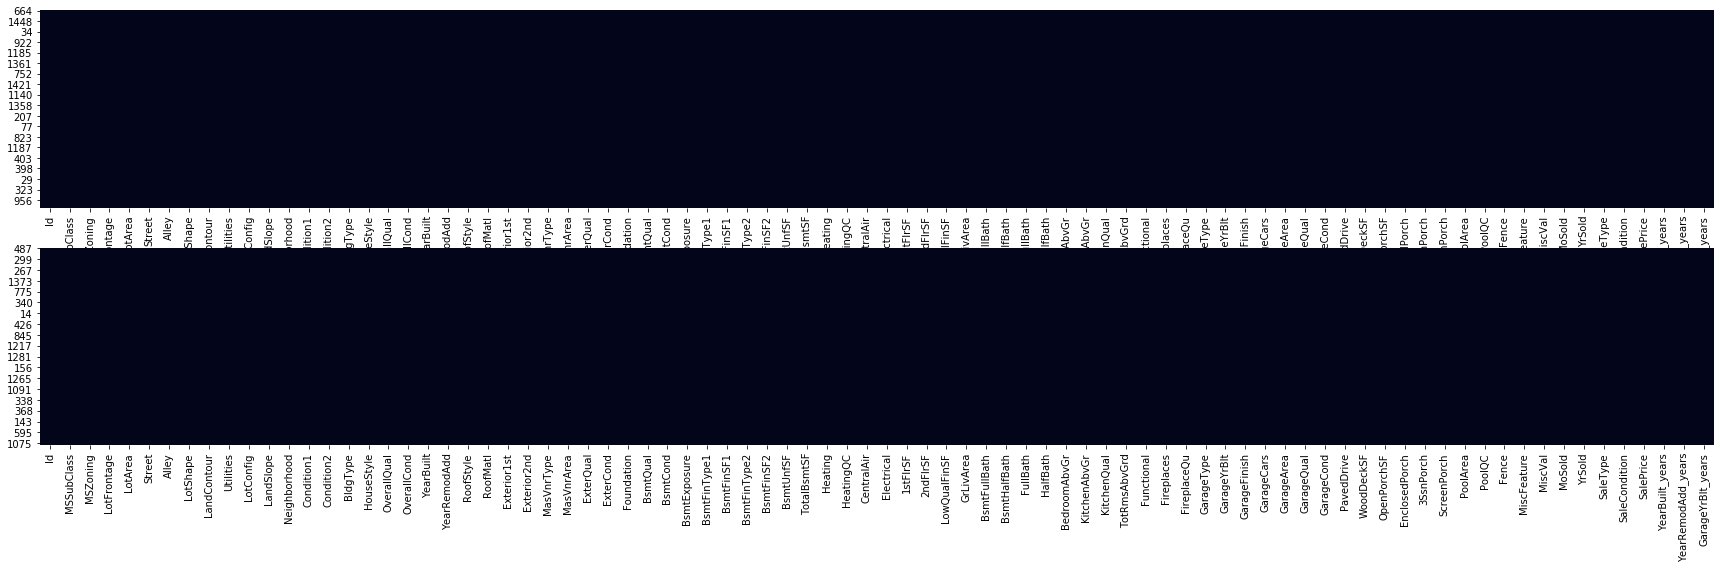

In [73]:
fig, ax = plt.subplots(2,1,figsize=(30,8))
sns.heatmap(X_train.iloc[:,:X_train.shape[1]].isnull(),cbar=False,ax=ax[0])
sns.heatmap(X_test.iloc[:,:X_test.shape[1]].isnull(),cbar=False,ax=ax[1])

## Frequency Encoding for Catogorical High Cardinality Features

In [74]:
high_cardinality_features = []
nominal_cat_feats = set(categorical_features) - set(ordinal_cols)
for feature in nominal_cat_feats:
    if len(X_train[feature].value_counts()) > 5:
        high_cardinality_features.append(feature)
        
print(high_cardinality_features)
#####################################################################

def high_cardinality(X_train, X_test):
    high_card_freq = {}
    data = X_train.copy()
    data_test = X_test.copy()
    
    for feature in high_cardinality_features:
        freq_feature = data[feature].value_counts().to_dict() # dataset - whole data before test train split
        data[feature] = data[feature].map(freq_feature)
        data_test[feature] = data_test[feature].map(freq_feature)
        high_card_freq[feature] = freq_feature
    return data, data_test, high_card_freq


X_train, X_test, high_card_freq = high_cardinality(X_train, X_test)

with open('./Storage/high_card_freq.pkl', 'wb') as f:
    pickle.dump(high_card_freq, f)

['Exterior2nd', 'Neighborhood', 'Condition1', 'Exterior1st', 'HouseStyle', 'GarageType']


In [75]:
X_train[high_cardinality_features].head(2)

,Exterior2nd,Neighborhood,Condition1,Exterior1st,HouseStyle,GarageType
664,459,76,25,468,643,789
678,459,24,1130,468,643,789


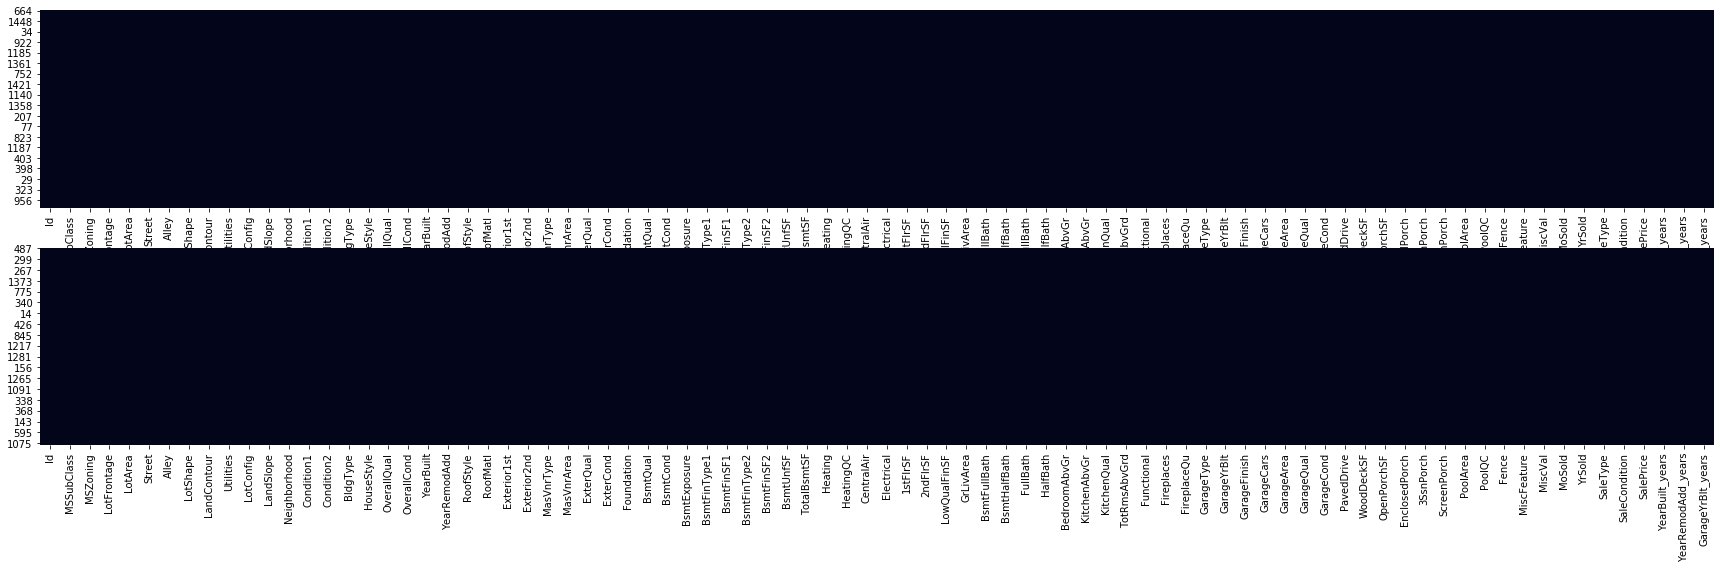

In [76]:
fig, ax = plt.subplots(2,1,figsize=(30,8))
sns.heatmap(X_train.iloc[:,:X_train.shape[1]].isnull(),cbar=False,ax=ax[0])
sns.heatmap(X_test.iloc[:,:X_test.shape[1]].isnull(),cbar=False,ax=ax[1])

In [34]:
remaining_cat_feats = set(categorical_features) - set(ordinal_cols) - set(high_cardinality_features)
print(len(remaining_cat_feats))
print(list(remaining_cat_feats))

15
['LandContour', 'RoofMatl', 'BldgType', 'Utilities', 'Electrical', 'RoofStyle', 'SaleType', 'SaleCondition', 'MSZoning', 'Foundation', 'LotConfig', 'MasVnrType', 'Condition2', 'MiscFeature', 'Heating']


In [77]:
print(X_train.shape)
print(X_test.shape)

(1314, 84)
(146, 84)


In [78]:
def cat_to_onehot(columns,df):
    
    df_final=df
    
    for index,col in enumerate(columns):
        
        df1=pd.get_dummies(df[col],drop_first=True)
        
        df.drop([col],axis=1,inplace=True)
        
        if index==0:
            df_final=df1.copy()
        else: 
            df_final=pd.concat([df_final,df1],axis=1)
     
    df_final=pd.concat([df,df_final],axis=1)
        
    return df_final

X_train = cat_to_onehot(remaining_cat_feats,X_train)
X_test = cat_to_onehot(remaining_cat_feats,X_test)

In [79]:
X_train =X_train.loc[:,~X_train.columns.duplicated()]
X_test =X_test.loc[:,~X_test.columns.duplicated()]
cols = set(X_train.columns).intersection(set(X_test.columns))
len(cols)

97

In [81]:
X_train = X_train[cols]
X_test = X_test[cols]

print(X_train.shape)
print(X_test.shape)

(1314, 97)
(146, 97)


In [37]:
'''
def cat_to_num(X_train,X_test,remaining_cat_feats):
    data = X_train[remaining_cat_feats].copy()
    data_test = X_test[remaining_cat_feats].copy()
    onehotencoder = OneHotEncoder(handle_unknown="ignore")
    data = onehotencoder.fit_transform(data)
    data_test = onehotencoder.transform(data_test)
    df = pd.DataFrame(data.toarray(),columns=onehotencoder.get_feature_names())
    df_test = pd.DataFrame(data_test.toarray(),columns=onehotencoder.get_feature_names())
    return df,df_test,onehotencoder

df,df_test,onehotencoder = cat_to_num(X_train,X_test,remaining_cat_feats)
'''

'\ndef cat_to_num(X_train,X_test,remaining_cat_feats):\n    data = X_train[remaining_cat_feats].copy()\n    data_test = X_test[remaining_cat_feats].copy()\n    onehotencoder = OneHotEncoder(handle_unknown="ignore")\n    data = onehotencoder.fit_transform(data)\n    data_test = onehotencoder.transform(data_test)\n    df = pd.DataFrame(data.toarray(),columns=onehotencoder.get_feature_names())\n    df_test = pd.DataFrame(data_test.toarray(),columns=onehotencoder.get_feature_names())\n    return df,df_test,onehotencoder\n\ndf,df_test,onehotencoder = cat_to_num(X_train,X_test,remaining_cat_feats)\n'

## Mean encoding for nominal variables

In [38]:
'''nominal_cat_feats = ['Condition2', 'SaleCondition', 'LandContour', 'RoofStyle', 'Foundation', 'Electrical', 
                     'BldgType', 'Neighborhood', 'Heating', 'MSZoning', 'SaleType', 'Exterior2nd', 'GarageType', 'LotConfig',
                      'Exterior1st', 'Condition1', 'MiscFeature', 'MasVnrType', 'HouseStyle', 'Utilities', 'RoofMatl']

# to convert catogorical to numerical
# Target guided ordinal encoding

def encode_nominal_cat_feats(X_train,X_test):
    
    label_order_list = {}  # {'Condition2': {'Rare_var': 0, 'Norm': 1}}
    
    data=X_train.copy()
    data_test=X_test.copy()
    
    for feature in nominal_cat_feats:
        labels_ordered=data.groupby([feature])['SalePrice'].mean().sort_values().index
        labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
        label_order_list[feature] = labels_ordered
        data[feature]=data[feature].map(labels_ordered)
        data_test[feature]=data_test[feature].map(labels_ordered)
    return data,data_test, label_order_list
        
data_train, data_test, label_order_list = encode_nominal_cat_feats(X_train,X_test)
    

#with open('C:/Users/Administrator/ML/House Prices Advanced Regression Techniques/Storage/labels_ordered.pkl', 'wb') as f:
#    pickle.dump(label_order_list, f)
#'''

"nominal_cat_feats = ['Condition2', 'SaleCondition', 'LandContour', 'RoofStyle', 'Foundation', 'Electrical', \n                     'BldgType', 'Neighborhood', 'Heating', 'MSZoning', 'SaleType', 'Exterior2nd', 'GarageType', 'LotConfig',\n                      'Exterior1st', 'Condition1', 'MiscFeature', 'MasVnrType', 'HouseStyle', 'Utilities', 'RoofMatl']\n\n# to convert catogorical to numerical\n# Target guided ordinal encoding\n\ndef encode_nominal_cat_feats(X_train,X_test):\n    \n    label_order_list = {}  # {'Condition2': {'Rare_var': 0, 'Norm': 1}}\n    \n    data=X_train.copy()\n    data_test=X_test.copy()\n    \n    for feature in nominal_cat_feats:\n        labels_ordered=data.groupby([feature])['SalePrice'].mean().sort_values().index\n        labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}\n        label_order_list[feature] = labels_ordered\n        data[feature]=data[feature].map(labels_ordered)\n        data_test[feature]=data_test[feature].map(labels_ordered)\n 

In [83]:
# Adding total sqfootage feature

X_train['TotalSF'] = X_train['TotalBsmtSF'] + X_train['1stFlrSF'] + X_train['2ndFlrSF']
X_test['TotalSF'] = X_test['TotalBsmtSF'] + X_test['1stFlrSF'] + X_test['2ndFlrSF']

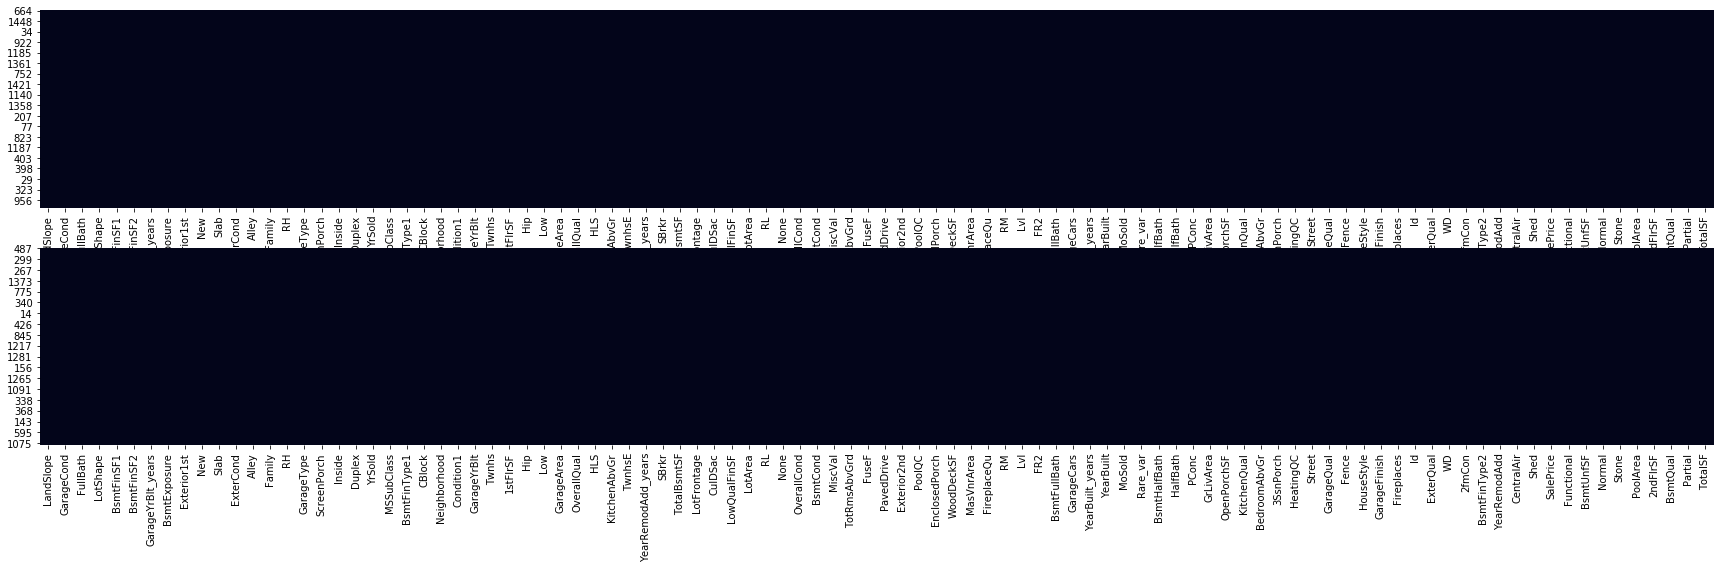

In [84]:
fig, ax = plt.subplots(2,1,figsize=(30,8))
sns.heatmap(X_train.iloc[:,:X_train.shape[1]].isnull(),cbar=False,ax=ax[0])
sns.heatmap(X_test.iloc[:,:X_test.shape[1]].isnull(),cbar=False,ax=ax[1])

In [85]:
print(X_train.shape)
print(X_test.shape)

(1314, 98)
(146, 98)


In [86]:
X_train.to_csv('C:/Users/Administrator/ML/House Prices Advanced Regression Techniques/Storage/X_train_no_scale.csv',index=False)
X_test.to_csv('C:/Users/Administrator/ML/House Prices Advanced Regression Techniques/Storage/X_test_no_scale.csv',index=False)
y_train.to_csv('C:/Users/Administrator/ML/House Prices Advanced Regression Techniques/Storage/y_train_no_scale.csv',index=False)
y_test.to_csv('C:/Users/Administrator/ML/House Prices Advanced Regression Techniques/Storage/y_test_no_scale.csv',index=False)

In [ ]:
######################################################################

## Feature Scaling

In [172]:
feature_scale=[feature for feature in X_train.columns if feature not in ['Id','SalePrice']]

scaler=MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[feature_scale])
X_test_scaled = scaler.transform(X_test[feature_scale])

In [173]:
# transform the train and test set, and add on the Id and SalePrice variables
train_data = pd.concat([X_train[['Id', 'SalePrice']].reset_index(drop=True), pd.DataFrame(X_train_scaled, columns=feature_scale)], axis=1)

test_data = pd.concat([X_test[['Id', 'SalePrice']].reset_index(drop=True), pd.DataFrame(X_test_scaled, columns=feature_scale)], axis=1)

In [178]:
test_data.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,488,12.072541,0.000000,0.75,0.445638,0.438913,1.0,1.0,0.5,0.333333,0.0,0.00,1.0,0.545455,0.4,1.0,0.75,0.6,0.444444,0.625,0.264706,0.606557,0.5,0.0,0.7,0.7,0.25,0.00000,0.50,0.666667,0.50,0.666667,0.666667,0.666667,0.8,0.176825,0.00,0.0,0.208048,0.242881,1.0,0.75,1.0,1.0,0.514582,0.000000,0.0,0.477459,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.333333,0.363636,1.0,0.333333,0.50,0.8,0.336449,0.0,0.50,0.343441,1.0,1.0,1.0,0.304348,0.000000,0.0,0.0,0.375,0.0,1.0,0.333333,0.5,0.000000,0.090909,0.25,0.666667,0.75,0.210245
1,1146,11.911702,0.176471,0.25,0.335614,0.307005,1.0,1.0,1.0,0.333333,0.0,0.00,1.0,0.136364,0.4,1.0,0.75,0.2,0.444444,0.625,0.573529,0.934426,0.5,0.0,0.3,0.3,0.25,0.00000,0.50,0.666667,0.25,0.333333,0.666667,0.000000,0.0,0.000000,0.00,0.0,0.446062,0.170540,1.0,1.00,1.0,1.0,0.365472,0.258596,0.0,0.500993,0.000000,0.0,0.333333,0.0,0.375,0.333333,0.333333,0.454545,1.0,0.333333,0.75,0.4,0.728972,0.0,0.25,0.158674,1.0,1.0,1.0,0.000000,0.000000,0.0,0.0,0.000,0.0,1.0,0.333333,0.5,0.000000,0.636364,0.00,0.666667,0.50,0.223223
2,294,12.367341,0.235294,0.75,0.456066,0.499194,1.0,1.0,0.5,0.333333,0.0,0.25,1.0,0.545455,0.8,1.0,0.75,1.0,0.666667,0.750,0.213235,0.213115,0.5,0.0,0.7,0.7,0.50,0.02125,0.50,0.666667,0.50,0.333333,0.666667,0.000000,0.8,0.140858,0.00,0.0,0.000000,0.130115,1.0,0.25,1.0,1.0,0.510011,0.384988,0.0,0.642556,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.545455,1.0,0.333333,0.50,0.8,0.271028,1.0,0.50,0.380113,1.0,1.0,1.0,0.000000,0.457038,0.0,0.0,0.000,0.0,1.0,0.333333,0.5,0.000000,0.181818,0.00,0.666667,0.75,0.225254
3,706,10.915088,1.000000,0.25,0.445638,0.285826,1.0,1.0,1.0,0.333333,0.0,0.00,1.0,0.000000,0.4,1.0,NaN,1.0,0.333333,0.500,0.588235,1.000000,1.0,0.0,1.0,0.4,0.25,0.00000,0.25,0.333333,0.00,0.000000,0.333333,0.333333,0.2,0.000000,0.25,0.0,0.000000,0.000000,1.0,0.25,0.0,1.0,-0.068873,0.348668,0.0,0.357444,0.000000,0.0,0.666667,0.0,0.375,0.666667,0.000000,0.363636,0.5,0.000000,0.25,0.0,0.289720,0.5,0.00,0.000000,0.5,0.5,0.0,0.000000,0.000000,0.0,0.0,0.000,0.0,1.0,0.333333,1.0,0.225806,0.545455,1.00,0.666667,0.75,0.101862
4,963,11.951180,0.823529,0.75,0.049425,0.112345,1.0,1.0,1.0,0.333333,0.0,0.25,1.0,0.454545,0.4,1.0,1.00,1.0,0.555556,0.625,0.227941,0.524590,0.5,0.0,0.7,NaN,0.25,0.00000,0.50,0.666667,0.50,0.666667,0.666667,0.000000,0.8,0.098512,0.00,0.0,0.106164,0.131588,1.0,0.50,1.0,1.0,0.256128,0.360291,0.0,0.493979,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.363636,1.0,0.333333,0.50,0.4,0.289720,0.0,0.50,0.310296,1.0,1.0,1.0,0.065217,0.000000,0.0,0.0,0.000,0.0,1.0,0.333333,0.5,0.000000,0.545455,0.25,0.666667,0.75,0.219221


In [179]:
train_data.to_csv('C:/Users/Administrator/ML/House Prices Advanced Regression Techniques/Storage/X_train.csv',index=False)
test_data.to_csv('C:/Users/Administrator/ML/House Prices Advanced Regression Techniques/Storage/X_test.csv',index=False)
y_train.to_csv('C:/Users/Administrator/ML/House Prices Advanced Regression Techniques/Storage/y_train.csv',index=False)
y_test.to_csv('C:/Users/Administrator/ML/House Prices Advanced Regression Techniques/Storage/y_test.csv',index=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.
